# **In the name of Allah**

**Hadi _ Alizadeh**

---
*   transfer learning of VGG16 on utkface dataset



## Import Dataset

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json  ~/.kaggle/

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download jangedoo/utkface-new

 99% 327M/331M [00:02<00:00, 152MB/s]
100% 331M/331M [00:02<00:00, 123MB/s]


In [ ]:
!unzip "/content/utkface-new.zip"

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_folder_name = 'UTKFace'

TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 198

dataset_dict = {
    'race_id': {
        0: 'white',
        1: 'black',
        2: 'asian',
        3: 'indian',
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}

dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['race_alias'] = dict((r, i) for i, r in dataset_dict['race_id'].items())

In [ ]:
def parse_dataset(dataset_path, ext='jpg'):
    """
    Used to extract information about our dataset. It does iterate over all images and return a DataFrame with
    the data (age, gender and sex) of all files.
    """
    def parse_info_from_file(path):
        """
        Parse information from a single file
        """
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')

            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['race_id'][int(race)]
        except Exception as ex:
            return None, None, None

    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))

    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)

    df = pd.DataFrame(records)
    df['file'] = files
    df.columns = ['age', 'gender', 'race', 'file']
    df = df.dropna()

    return df

In [ ]:
df = parse_dataset("/content/UTKFace")
df.head()

,age,gender,race,file
0,30.0,male,black,/content/UTKFace/30_0_1_20170117123820956.jpg....
1,24.0,male,white,/content/UTKFace/24_0_0_20170117194640228.jpg....
2,35.0,male,black,/content/UTKFace/35_0_1_20170113142523669.jpg....
3,35.0,male,asian,/content/UTKFace/35_0_2_20170116182223485.jpg....
4,28.0,male,black,/content/UTKFace/28_0_1_20170117164811684.jpg....


In [ ]:
import plotly.graph_objects as go

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()

    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)

    fig.show()

In [ ]:
plot_distribution(df['gender'])

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="age", nbins=116)
fig.update_layout(title_text='Age distribution')
fig.show()

In [ ]:
bins = [0, 10, 20, 30, 40, 60, 80, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-60', '60-80', '80+']

age_binned = pd.cut(df['age'], bins, labels=names)
plot_distribution(age_binned)

## Data generator

In [ ]:
augmented_df = df

In [ ]:
augmented_df

,age,gender,race,file
0,58.0,male,white,/content/UTKFace/58_0_0_20170111204009616.jpg....
1,58.0,female,black,/content/UTKFace/58_1_1_20170117194028702.jpg....
2,1.0,female,white,/content/UTKFace/1_1_0_20170109190936410.jpg.c...
3,89.0,female,white,/content/UTKFace/89_1_0_20170120230445570.jpg....
4,31.0,male,asian,/content/UTKFace/31_0_2_20161219192759515.jpg....
...,...,...,...,...
23703,29.0,female,white,/content/UTKFace/29_1_0_20170104192921991.jpg....
23704,1.0,female,white,/content/UTKFace/1_1_0_20170110212607474.jpg.c...
23705,40.0,male,indian,/content/UTKFace/40_0_3_20170119192039721.jpg....
23706,14.0,female,indian,/content/UTKFace/14_1_3_20170104221901782.jpg....


In [ ]:
import pandas as pd
import numpy as np
from imgaug import augmenters as iaa
from PIL import Image
import imgaug as ia
import cv2
import random

labels = df['age'].value_counts().index.tolist()
counts = df['age'].value_counts().values.tolist()
Mean_data_count = int(np.mean(counts))

seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)),  # apply Gaussian blur with a sigma between 0 and 3.0
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # add Gaussian noise
    iaa.Affine(rotate=(-45, 45))  # rotate the image between -45 and 45 degrees
])
normalized_data = pd.DataFrame()

for age in labels:
  ind = labels.index(age)
  if counts[ind] < Mean_data_count:
        num_additional_images = Mean_data_count - counts[ind]
        class_data = df[df['age'] == age]
        print(age)
        # Select random images
        random_im = class_data.sample(n=1)
        random_images = random_im['file'].tolist()
       # for index, row in random_im.iterrows()

       # random_images = row['file']
        # Convert the selected images into NumPy arrays
        selected_images = [np.array(Image.open(image_path)) for image_path in random_images]

        for image_path in selected_images:
            print(random_images[0])
            image = cv2.imread(random_images[0])
            #print(image)
            augmented_images = [seq.augment_image(image) for _ in range(num_additional_images)]


         # Save the augmented images and update the augmented dataframe
        for i, augmented_image in enumerate(augmented_images):
            pat = random_images[0].split('.jpg.chip.jpg')[0]
            augmented_path = f'{pat}_{i}.jpg.chip.jpg'
            cv2.imwrite(augmented_path, augmented_image)
            augmented_row = random_im.copy()  # Create a copy of the original row
            augmented_row['file'] = augmented_path  # Update the 'file' column with the augmented path
            augmented_df = augmented_df.append(augmented_row, ignore_index=True)


  else:
    num_delet = counts[ind] - Mean_data_count
    clas= df[df['age'] == age]
    random_rows = clas.sample(n=num_delet)
    augmented_df = augmented_df.drop(random_rows.index)



5.0
/content/UTKFace/5_0_4_20170103212624758.jpg.chip.jpg


<ipython-input-12-935aa5f7016c>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append(augmented_row, ignore_index=True)


15.0
/content/UTKFace/15_1_0_20170109213613605.jpg.chip.jpg
47.0
/content/UTKFace/47_0_4_20170104210443652.jpg.chip.jpg
9.0
/content/UTKFace/9_1_0_20170105000600802.jpg.chip.jpg
61.0
/content/UTKFace/61_0_0_20170105173233956.jpg.chip.jpg
17.0
/content/UTKFace/17_0_0_20170105183615673.jpg.chip.jpg
43.0
/content/UTKFace/43_0_2_20170104210607932.jpg.chip.jpg
14.0
/content/UTKFace/14_1_0_20170109204846649.jpg.chip.jpg
10.0
/content/UTKFace/10_0_0_20170103200329407.jpg.chip.jpg
85.0
/content/UTKFace/85_0_0_20170111223921971.jpg.chip.jpg
46.0
/content/UTKFace/46_0_3_20170119183135878.jpg.chip.jpg
48.0
/content/UTKFace/48_1_0_20170105173544229.jpg.chip.jpg
49.0
/content/UTKFace/49_0_3_20170119205458583.jpg.chip.jpg
75.0
/content/UTKFace/75_0_2_20170112205221689.jpg.chip.jpg
70.0
/content/UTKFace/70_0_0_20170117173910928.jpg.chip.jpg
33.0
/content/UTKFace/33_1_0_20170119145706157.jpg.chip.jpg
7.0
/content/UTKFace/7_1_3_20161220221712842.jpg.chip.jpg
51.0
/content/UTKFace/51_0_3_201701192003050

In [ ]:
import plotly.express as px
fig = px.histogram(augmented_df, x="age", nbins=116)
fig.update_layout(title_text='Age distribution')
fig.show()

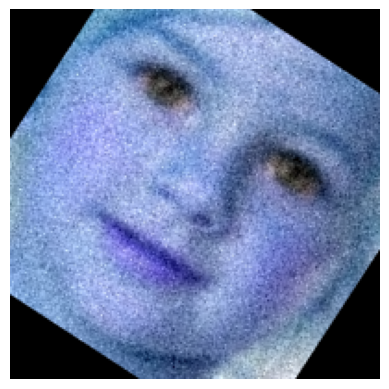

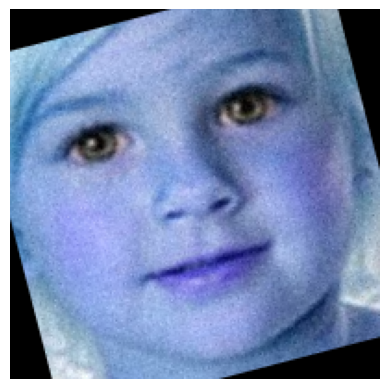

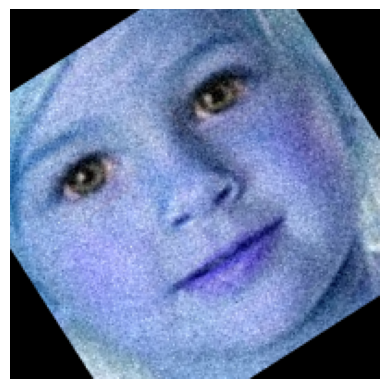

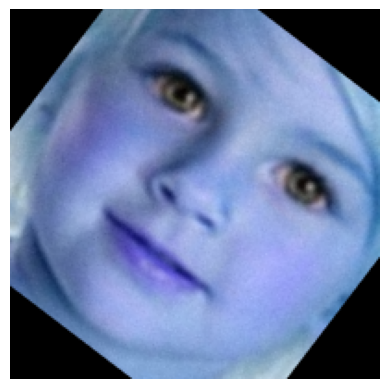

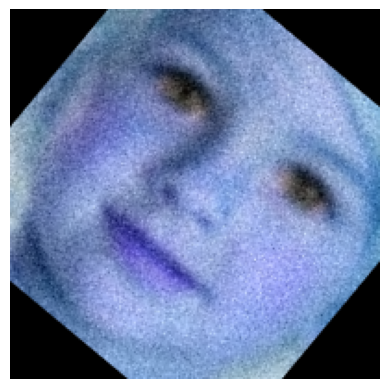

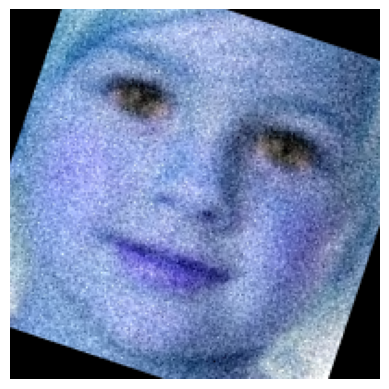

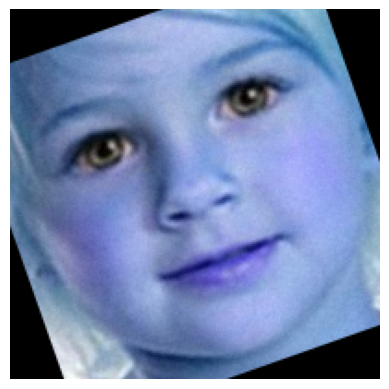

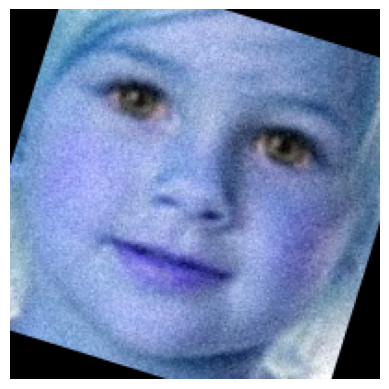

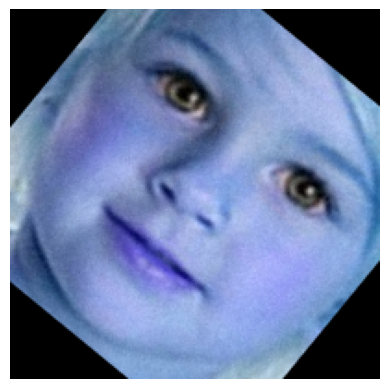

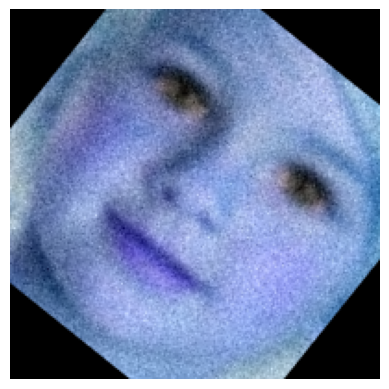

In [ ]:
for image in augmented_images:
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

## Train model

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.utils import shuffle

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

%matplotlib inline

from PIL import Image
import shutil

In [ ]:
IMAGE_SIZE = [224,224]
TRAIN_TEST_SPLIT = 0.3
NR_EPOCHS = 7

In [ ]:
training_data = augmented_df.sample(frac=0.8, random_state=25)
temp = augmented_df.drop(training_data.index)


val_data =  temp.sample(frac=0.7, random_state=25)
testing_data = temp.drop(val_data.index)


print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of training examples: {val_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")



No. of training examples: 18886
No. of training examples: 3305
No. of testing examples: 1417



## Direct Age Estimation


In [ ]:
NR_EPOCHS = 7
# reads image_path and returns decoded img
def process_path(file_path, label):
    #read file path
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    #convert the values from 0-1
    img = tf.image.convert_image_dtype(img, tf.float32)
    # preprocess image for VGG16
    img = preprocess_input(img)
    img = tf.image.resize(img, IMAGE_SIZE)
    return img, label

In [ ]:
labels_train =  tf.keras.utils.to_categorical(training_data['age'], num_classes=117)
labels_val =  tf.keras.utils.to_categorical(val_data['age'], num_classes=117)
labels_test =  tf.keras.utils.to_categorical(testing_data['age'], num_classes=117)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_data['file'],labels_train))
train_dataset = train_dataset.shuffle(len(training_data))
train_dataset = train_dataset.map(process_path, num_parallel_calls=4)
train_dataset = train_dataset.batch(64)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data['file'],labels_val))
val_dataset = val_dataset.shuffle(len(val_data))
val_dataset = val_dataset.map(process_path, num_parallel_calls=4)
val_dataset = val_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((testing_data['file'],labels_test))
test_dataset = test_dataset.shuffle(len(testing_data))
test_dataset = test_dataset.map(process_path, num_parallel_calls=4)
test_dataset = test_dataset.batch(64)

In [ ]:
model = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

for layer in model.layers:
    layer.trainable=False

In [ ]:
x2 = Flatten()(model.output)
x2 = Dense(4096, activation='relu')(x2)
x2 = Dense(4096, activation='relu')(x2)
prediction2 = Dense(117, activation='softmax')(x2)
model_direct = Model(inputs=model.input, outputs=prediction2)
model_direct.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_direct.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
DIRECT_PATH = "./models/direct_age_aug_best_model.h5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(DIRECT_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')

import datetime
log_dir = '../tblogs/direct_age_model_aug' + datetime.datetime.now().strftime('%y-%m-%d_%H-%M')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)

log_dir

'../tblogs/direct_age_model_aug23-09-22_16-32'

In [ ]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

history_direct = model_direct.fit(train_dataset,
                    epochs=NR_EPOCHS,
                    batch_size = 64,
                    validation_data=val_dataset,
                    callbacks = [tensorboard_callback, checkpoint]
                    )

Epoch 1/7
296/296 [==============================] - ETA: 0s - loss: 4.5282 - accuracy: 0.0149
Epoch 1: val_accuracy improved from 0.00756 to 0.02179, saving model to ./models/direct_age_aug_best_model.h5
296/296 [==============================] - 106s 356ms/step - loss: 4.5282 - accuracy: 0.0149 - val_loss: 4.3775 - val_accuracy: 0.0218
Epoch 2/7
296/296 [==============================] - ETA: 0s - loss: 4.3624 - accuracy: 0.0234
Epoch 2: val_accuracy improved from 0.02179 to 0.02844, saving model to ./models/direct_age_aug_best_model.h5
296/296 [==============================] - 118s 398ms/step - loss: 4.3624 - accuracy: 0.0234 - val_loss: 4.3225 - val_accuracy: 0.0284
Epoch 3/7
296/296 [==============================] - ETA: 0s - loss: 4.2845 - accuracy: 0.0282
Epoch 3: val_accuracy did not improve from 0.02844
296/296 [==============================] - 100s 338ms/step - loss: 4.2845 - accuracy: 0.0282 - val_loss: 4.3555 - val_accuracy: 0.0203
Epoch 4/7
296/296 [====================

In [ ]:
history_direct.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

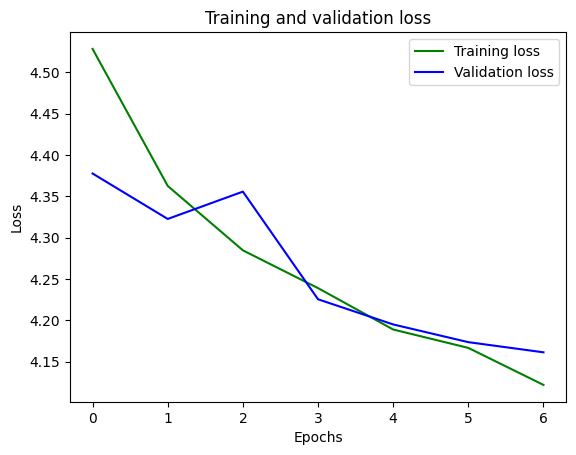

In [ ]:
NR_EPOCHS = len(history_direct.history['loss'])
loss_train_direct = history_direct.history['loss']
loss_val_direct = history_direct.history['val_loss']
epochs = range(NR_EPOCHS)
plt.plot(epochs, loss_train_direct, 'g', label='Training loss')
plt.plot(epochs, loss_val_direct, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

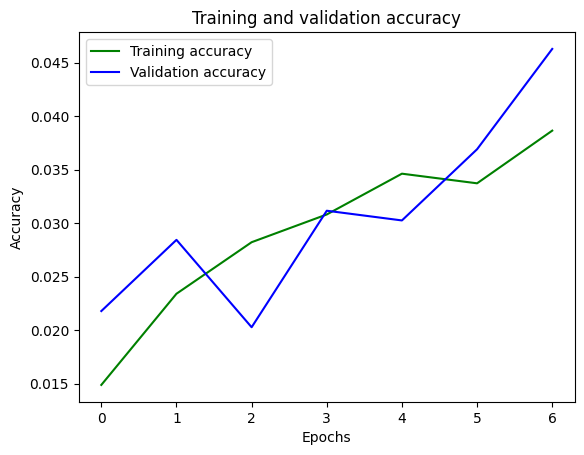

In [ ]:
accuracy_direct = history_direct.history['accuracy']
accuracy_val_direct = history_direct.history['val_accuracy']
epochs = range(NR_EPOCHS)
plt.plot(epochs, accuracy_direct, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val_direct, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_age_direct = load_model("./models/direct_age_aug_best_model.h5")
loss, acc = model_age_direct.evaluate(test_dataset)
print(loss, acc)

23/23 [==============================] - 7s 309ms/step - loss: 4.1350 - accuracy: 0.0353
4.134974956512451 0.035285815596580505
